<a href="https://colab.research.google.com/github/AnhTuan1807/BTVN/blob/main/Nhan_dien_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Khai bao cac thu vien can su dung
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
#Ket noi voi google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Tao ra class ImageDataGenerator de chinh sua anh 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Hat gao/Train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 1950 images belonging to 10 classes.


In [33]:
# Tao bo du lieu test
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Hat gao/Test', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 75 images belonging to 10 classes.


In [34]:
# Cac nhan co trong bo du lieu training
training_set.class_indices

{'Arborio': 0,
 'Basmati': 1,
 'Ipsala': 2,
 'Jasmine': 3,
 'Karacadag': 4,
 'gao bac huong': 5,
 'gao luc': 6,
 'gao nang thom': 7,
 'gao nep': 8,
 'gao thom thai': 9}

In [35]:
# Cac nhan co trong bo du lieu test
test_set.class_indices

{'Arborio': 0,
 'Basmati': 1,
 'Ipsala': 2,
 'Jasmine': 3,
 'Karacadag': 4,
 'gao bac huong': 5,
 'gao luc': 6,
 'gao nang thom': 7,
 'gao nep': 8,
 'gao thom thai': 9}

In [36]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(1950, 224, 224, 3)
(1950, 10)


In [37]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(75, 224, 224, 3)
(75, 10)


In [39]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(224,224,3), padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 128)     

In [40]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [41]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2)

Epoch 1/100
61/61 - 4s - loss: 1.6972 - accuracy: 0.1944 - 4s/epoch - 62ms/step
Epoch 2/100
61/61 - 3s - loss: 1.6132 - accuracy: 0.2272 - 3s/epoch - 53ms/step
Epoch 3/100
61/61 - 3s - loss: 1.5760 - accuracy: 0.2774 - 3s/epoch - 54ms/step
Epoch 4/100
61/61 - 3s - loss: 1.4633 - accuracy: 0.3651 - 3s/epoch - 53ms/step
Epoch 5/100
61/61 - 3s - loss: 1.3245 - accuracy: 0.4528 - 3s/epoch - 54ms/step
Epoch 6/100
61/61 - 3s - loss: 1.0751 - accuracy: 0.5713 - 3s/epoch - 53ms/step
Epoch 7/100
61/61 - 3s - loss: 0.8102 - accuracy: 0.6918 - 3s/epoch - 54ms/step
Epoch 8/100
61/61 - 3s - loss: 0.5276 - accuracy: 0.8026 - 3s/epoch - 54ms/step
Epoch 9/100
61/61 - 3s - loss: 0.2804 - accuracy: 0.9072 - 3s/epoch - 54ms/step
Epoch 10/100
61/61 - 3s - loss: 0.1357 - accuracy: 0.9585 - 3s/epoch - 54ms/step
Epoch 11/100
61/61 - 3s - loss: 0.0836 - accuracy: 0.9769 - 3s/epoch - 54ms/step
Epoch 12/100
61/61 - 3s - loss: 0.0485 - accuracy: 0.9872 - 3s/epoch - 54ms/step
Epoch 13/100
61/61 - 3s - loss: 0.027

In [42]:
# Danh gia ve do chinh xac cua mo hinh 
Score=model.evaluate(x_train,y_train,verbose=2)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

61/61 - 2s - loss: 2.6025e-06 - accuracy: 1.0000 - 2s/epoch - 29ms/step
Train Loss 2.6025340957858134e-06
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

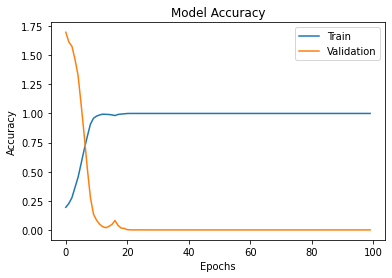

In [43]:
# Ve do thi giua sai so (Loss) va do chinh xac (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [45]:
# Luu lai
model.save("Nhan_dien_Hatgao.h5")

In [46]:
# Tai mo hinh
model_ANN=load_model('Nhan_dien_Hatgao.h5')

In [47]:
class_names = ["Arborio", "Basmati", "Ipsala","Jasmine","Karacadag","gao bac huong","gao luc","gao nang thom","gao nep","gao thom thai"]

1/1 [==============================] - 0s 26ms/step
[[9.9909711e-01 8.4961538e-10 8.9656794e-04 8.2299410e-12 6.3516245e-06
  1.8520862e-34 9.2516967e-33 1.7853652e-34 5.1462148e-36 6.5307288e-31]]
Kết quả:  Arborio
Độ chính xác:  0.9990971


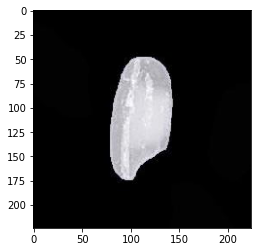

In [61]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/Hat gao/Test/Arborio/Bản sao của Arborio (9).jpg"
img = load_img(url, target_size=(224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 224,224,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 224,224,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)